In [22]:
import numpy as np
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
import time
import diffusionstuff6 as ds
from copy import copy as dup
from scipy.integrate import odeint

In [23]:
# Graphics parameters
%matplotlib notebook
ticklabelsize = 15
fontsize = 15
linewidth = 2
fignum = 0

In [24]:
# All the parameters

# lastfile = 'NeshData/continuum_model6 20-5-2016[2][1].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[2][2].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 20-5-2016[2][2].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 20-5-2016[2][2].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 18-5-2016[1][6].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 18-5-2016[1][7].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 18-5-2016[1][7].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 18-5-2016[1][7].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[3][6].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[3][7].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 20-5-2016[3][7].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 20-5-2016[3][7].traj0.npz'; traj0flag = False

# lastfile = 'NeshData/continuum_model6 20-5-2016[3][7].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[3][8].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 20-5-2016[3][8].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 20-5-2016[3][8].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[4][3].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[4][4].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 20-5-2016[4][4].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 20-5-2016[4][4].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 18-5-2016[1][7].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 18-5-2016[1][8].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 18-5-2016[1][8].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 18-5-2016[1][8].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[2][2].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[2][3].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 20-5-2016[2][3].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 20-5-2016[2][3].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[2][5].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 20-5-2016[2][6].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 20-5-2016[2][6].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 20-5-2016[2][6].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 26-5-2016[1][2].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 26-5-2016[1][3].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 26-5-2016[1][3].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 26-5-2016[1][3].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[2][1].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 26-5-2016[2][2].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 26-5-2016[2][2].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 26-5-2016[2][2].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 20-5-2016[3][5].npz'; Load_old_file = True
# nextfile = 'NeshData/continuum_model6 26-5-2016[3][6].npz'; Save_new_file = True
# trajfile = 'NeshData/continuum_model6 26-5-2016[3][6].traj.npz'; trajflag = True
# traj0file= 'NeshData/continuum_model6 26-5-2016[3][6].traj0.npz'; traj0flag = True

lastfile = 'NeshData/continuum_model6 28-5-2016[1][1].npz'; Load_old_file = False
nextfile = 'NeshData/continuum_model6 28-5-2016[1][1].npz'; Save_new_file = False
trajfile = 'NeshData/continuum_model6 28-5-2016[1][1].traj.npz'; trajflag = False
traj0file= 'NeshData/continuum_model6 28-5-2016[1][1].traj0.npz'; traj0flag = False

# lastfile = 'NeshData/continuum_model6 28-5-2016[2][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 28-5-2016[2][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 28-5-2016[2][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 28-5-2016[2][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 28-5-2016[3][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 28-5-2016[3][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 28-5-2016[3][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 28-5-2016[3][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 28-5-2016[4][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 28-5-2016[4][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 28-5-2016[4][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 28-5-2016[4][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[1][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[1][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[1][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[1][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[2][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[2][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[2][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[2][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[3][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[3][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[3][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[3][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[4][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[4][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[4][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[4][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[5][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[5][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[5][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[5][1].traj0.npz'; traj0flag = True

# lastfile = 'NeshData/continuum_model6 29-5-2016[6][1].npz'; Load_old_file = False
# nextfile = 'NeshData/continuum_model6 29-5-2016[6][1].npz'; Save_new_file = False
# trajfile = 'NeshData/continuum_model6 29-5-2016[6][1].traj.npz'; trajflag = False
# traj0file= 'NeshData/continuum_model6 29-5-2016[6][1].traj0.npz'; traj0flag = True

In [25]:
# Number of iterations to calculate Nliq from Ntot
niter = 1

# Loading/initializing state
if not Load_old_file:

    # Message
    print("Starting a new system")
    nx = 500 # Number of points in simulation box
    xmax = 50
    #xmax = 20
    x = np.linspace(0, xmax, nx)
    boxpoints = len(x)
    deltaX = x[1]-x[0]
    Nbar = 1.0 # new Nbar from VMD, 260K
    Nstar = .9/(2*np.pi)
    #Nstar = .55/(2*np.pi)

    # Initialize as a pre-equilibrated layer of liquid over ice
    Nice = np.zeros(boxpoints)+1
    Fliq = ds.getNliq(Nice,Nstar,Nbar,niter) # mess it up here, e.g double thickness in random spot/area
    splitPoint = math.floor(len(Fliq)/2)
    Fliq[0:splitPoint] *= 1.5 #first half of fliq increased by 50% thickness

else:
    
    # Message
    print("loading", lastfile)
    npzfile = np.load(lastfile)
    Fliq = npzfile['Fliq']
    Nice = npzfile['Nice']
    Nbar = npzfile['Nbar']
    Nstar = npzfile['Nstar']
    x = npzfile['x']
    boxpoints = len(x)
    nx = len(x)
    deltaX = x[1]-x[0]
    

Starting a new system


<IPython.core.display.Javascript object>


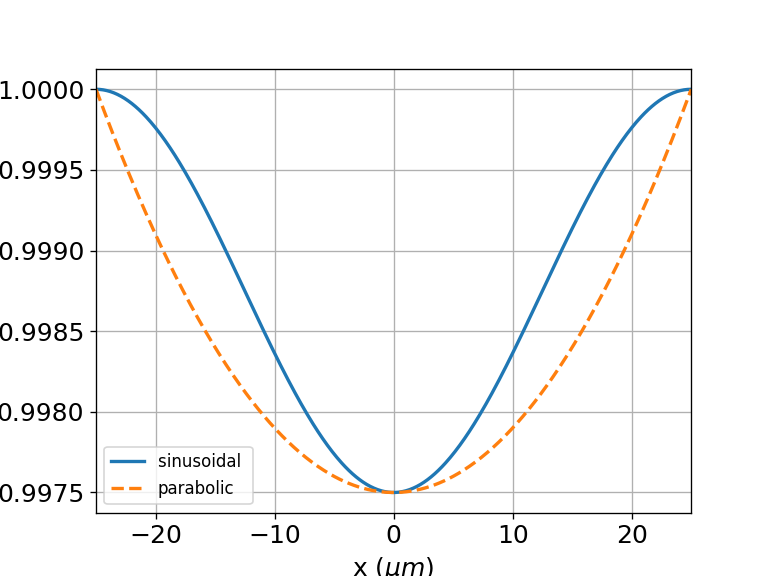

In [26]:
# Lay out the system
Ntot = Fliq + Nice
nmid = int(nx/2)
nquart = int(nx/4)
xmid = max(x)/2
xmax = x[nx-1]
Nice_start = Nice[0]
Niceoffset = ds.getNiceoffset(Nbar, Nstar, 1, 0) # Should be close to .75; not used if D=const

# Just conversions
nmpermonolayer = 0.3
umpersec_over_mlyperus = (nmpermonolayer/1e3*1e6)

# Diffusion coefficient
D = 0.02e-2 # micrometers^2/microsecond

# Time steps
dtmaxtimefactor = 10
dtmaxtimefactor = 50
dtmax = deltaX**2/D
deltaT = dtmax/dtmaxtimefactor

# Deposition rate
nu_kin = 49 # microns/second
deprate = nu_kin/umpersec_over_mlyperus # monolayers per microsecond
deprate_times_deltaT = deprate * deltaT

# Supersaturation
sigma0 = 0.19
sigmastepmax = 0.20 # Must be bigger than sigma0 to get growth
center_reduction = 0.25 # In percent
c_r = center_reduction/100

# Diffusion coefficient scaled for this time-step and space-step
DoverdeltaX2 = D/deltaX**2

# Gets the function sigma(x)
sigmastep_sinusoid = ds.getsigmastep(x,xmax,center_reduction,sigmastepmax,method='sinusoid')
sigmastep_parabolic = ds.getsigmastep(x,xmax,center_reduction,sigmastepmax,method='parabolic')
sigmastepstyle = 'sinusoid'
if sigmastepstyle=='sinusoid':
    sigmastep = sigmastep_sinusoid
elif sigmastepstyle=='parabolic':
    sigmastep = sigmastep_parabolic
else:
    print('bad choice')

# Graph sigma(x)
fignum +=1
plt.figure(fignum)
plt.plot(x-xmid,sigmastep_sinusoid/sigmastepmax, \
         x-xmid, sigmastep_parabolic/sigmastepmax, '--',lw=linewidth)
plt.xlim([-xmid,xmid])
plt.legend(['sinusoidal ', 'parabolic'])
plt.xlabel(r'x ($\mu m$)',fontsize=fontsize)
plt.ylabel(r'$\sigma_I(x) $',fontsize=fontsize)
plt.grid('on')

In [27]:
# These are run control parameters

# Flag for explicit updating Fliq(Ntot) every step
updatingFliq = True

# Set up a maximum number of iterations or layers
uselayers = True

# 0D run
if uselayers:
    layermax_0D = 4
else:
    countermax_0D = 100

# 1D run 
if uselayers:
    layermax_1D = 50
else:
    countermax_1D = 15000
    

In [28]:
# Reporting
print("D =", D, 'um^2/us',D * 1e-12*1e6*1e9, 'x 10^-9 m^2/sec')
print('deltaT_max (Diffusion time)', dtmax)
print('deltaT =', deltaT)
print('deprate =', deprate, 'monolayers/us')
print('nmid', nmid)
print('N*', Nstar)
print('N*x2pi', Nstar*2*np.pi)
print('Nbar, Nbar-N*, N*/Nbar', Nbar, Nbar-Nstar, Nstar/Nbar)
print('deltaX', deltaX)
print('sigma_0 =', sigma0)
print('sigmastepmax =', sigmastepmax)
print('center reduction', center_reduction, '%')
print('max growth rate =', deprate*sigmastepmax*umpersec_over_mlyperus, 'um/sec')
print('min growth rate =', deprate*(sigmastepmax-sigma0)*umpersec_over_mlyperus, 'um/sec')
print('nu_kin =', nu_kin, 'um/sec')

D = 0.0002 um^2/us 0.2 x 10^-9 m^2/sec
deltaT_max (Diffusion time) 50.20060160400962
deltaT = 1.0040120320801924
deprate = 0.16333333333333333 monolayers/us
nmid 250
N* 0.1432394487827058
N*x2pi 0.9
Nbar, Nbar-N*, N*/Nbar 1.0 0.8567605512172942 0.1432394487827058
deltaX 0.10020040080160321
sigma_0 = 0.19
sigmastepmax = 0.2
center reduction 0.25 %
max growth rate = 9.8 um/sec
min growth rate = 0.49000000000000044 um/sec
nu_kin = 49 um/sec


<IPython.core.display.Javascript object>


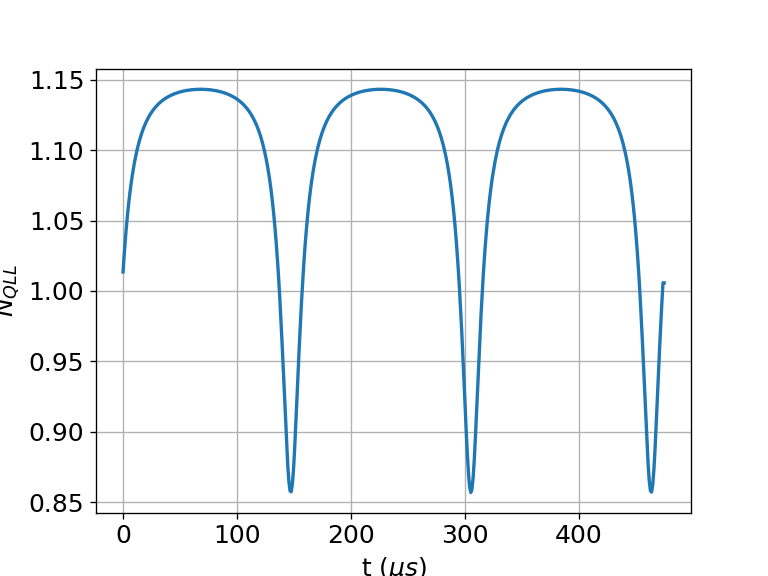

0-D Modeled growth rate, um/s 1.899181115497279
0-D Modeled growth rate, ml/us 0.0063306037183242635
0-D Modeled alpha 0.19379399137727338


In [29]:
# This is the 0-d run

# Bundle parameters for ODE solver
params = [Nbar, Nstar, niter, sigmastepmax, sigma0, deprate]

# Initial conditions for ODE solver
y0 = [Nbar, 0.0]
ylast = dup(y0)

# Time steps
t0 = 0.0
ttot = 0.0
tinterval = [t0, deltaT]

# Initialize the keeper arrays
tkeep_0D = [t0]
ykeep_0D = [y0]
tlast = dup(t0)
Nicelast0 = 0.0
Ntotlast0 = 0.0
Nicelast_start = 0.0
Ntotlast_start = 0.0

# Call the ODE solver
counter = 0
layer = 0
while True:
    
    # Integrate up to next time step
    y = odeint(ds.f0d, ylast, tinterval, args=(params,))
    ylast = list(y[1,:])
    tlast += deltaT
    
    # Stuff into keeper arrays
    ykeep_0D.append(ylast)
    tkeep_0D.append(tlast)
    
    # Make some local copies, with possible updates to Fliq
    Fliqlast, Ntotlast = ylast
    if updatingFliq:
        Fliqlast = ds.getNliq(Ntotlast,Nstar,Nbar,niter) # This updates Fliqlast and ylast!
        ykeep_0D[counter][0] = Fliqlast # Saves the updated Fliq for this step
    Nicelast = Ntotlast - Fliqlast
    Nicelast0 = dup(Nicelast)
    Ntotlast0 = dup(Ntotlast)
    
    # Update counters and see whether to break
    counter += 1
    layer = dup(Ntotlast0) 
    if uselayers:
        if layer > layermax_0D-1:
            break
    else:
        if counter > countermax_0D-1:
            break
    
# Convert results to a numpy array
ykeep_0Darr = np.array(ykeep_0D, np.float64)
tkeep_0Darr = np.array(tkeep_0D, np.float64)

# Plot results
fignum +=1
plt.figure(fignum)
rcParams['xtick.labelsize'] = ticklabelsize 
rcParams['ytick.labelsize'] = ticklabelsize
plt.plot(tkeep_0D,ykeep_0Darr[:,0],lw=linewidth)
plt.xlabel(r't ($\mu s$)',fontsize=fontsize)
plt.ylabel(r'$N_{QLL} $',fontsize=fontsize)
plt.grid('on')

# Growth statistics
delta_Ntot_0d = Ntotlast0-Ntotlast_start
growthrate_0d_mlyperus = delta_Ntot_0d/tlast # monolayer/us
growthrate_0d = growthrate_0d_mlyperus*umpersec_over_mlyperus # um/sec
print( "0-D Modeled growth rate, um/s", growthrate_0d)
print( "0-D Modeled growth rate, ml/us", growthrate_0d_mlyperus)
alpha_0d = growthrate_0d/nu_kin/sigmastepmax
print( "0-D Modeled alpha", alpha_0d)

In [30]:
L = xmax/2; print(L) # micrometers
c_r = center_reduction / 100; print(c_r) # dimensionless
nu_kin_ml = deprate; print(nu_kin_ml) # monolayers per microsecond
sigma_I = sigmastepmax; print(sigma_I) # dimensionless
print(D) # D is in micrometers^2/microsecond
M = np.array([.0027, .0025])
B = np.array([2.9, 1.59])
beta = np.array([0.65, 0.65])
xfactor = nu_kin_ml*L**2*c_r**beta*sigma_I/D
NSS = M*xfactor + B
print('Nss predicted')
print('sinusoid:', NSS[0])
print('paraboloic:', NSS[1])

25.0
0.0025
0.16333333333333333
0.2
0.0002
Nss predicted
sinusoid: 8.510216387742963
paraboloic: 6.784644803465706


In [31]:
# This is the 1-d run

# Timing
sec1 = time.time()

# Bundle parameters for ODE solver
params = [Nbar, Nstar, niter, sigmastep, sigma0, deprate, DoverdeltaX2, nx]

# Initial conditions for ODE solver
y0 = list((Fliq,Ntot))
ylast = dup(y0)

# Time steps
t0 = 0.0
tlast = dup(t0)
ttot = 0.0
tinterval = [t0, deltaT]

# Initialize the keeper arrays
tkeep = [t0]
Nicekeep = [dup(Nice)]
Ntotkeep = [dup(Ntot)]
Fliqkeep = [dup(Fliq)]
fluxderivskeep = []

# Call the ODE solver
Nice0_start = Nice[0]
Nice0 = Nice[0]
Ntot0_start = Ntot[0]
Ntot0 = Ntot[0]
updatingFliq = True
counter = 0
lastlayer = 0
lastdiff = 0
while True:
    
    # Integrate up to next time step
    y = odeint(ds.f1d, np.reshape(ylast,2*nx), tinterval, args=(params,),rtol=1e-12)
    ylast = np.reshape(y[1],(2,nx))
    tlast += deltaT
    counter += 1
        
    # Make some local copies, with possible updates to Fliq
    Fliq, Ntot = ylast
    if updatingFliq:
        Fliq = ds.getNliq(Ntot,Nstar,Nbar,niter) # This updates to remove any drift
        ylast[0] = Fliq
    Nice = Ntot - Fliq
    Nice0 = Nice[0]
    Ntot0 = Ntot[0]
    ttot += deltaT
    
    # Stuff into keeper arrays if requested
    if trajflag:
        Nicekeep.append(Nice)
        Ntotkeep.append(Ntot)
        Fliqkeep.append(Fliq)
        tkeep.append(ttot)
    
    # Update counters and see whether to break
    layer = Ntot0-Ntot0_start
    if (layer-lastlayer) > 0:
        minpoint = min(Nice)
        maxpoint = max(Nice)
        print(counter-1, lastlayer, maxpoint-minpoint, maxpoint-minpoint-lastdiff)
        lastdiff = maxpoint-minpoint
        lastlayer += 1
    if uselayers:
        if layer > layermax_1D-1:
            break
    else:
        if counter > countermax_1D-1:
            break

3 0 0.5307784747177455 0.5307784747177455
160 1 1.0854408708843108 0.5546623961665653
317 2 1.1737485881749028 0.08830771729059195
474 3 1.2211129248454697 0.04736433667056694
632 4 1.2676447109109867 0.046531786065517
789 5 1.283327371582085 0.015682660671098247
947 6 1.317704755132504 0.03437738355041908
1104 7 1.3205805662461607 0.0028758111136566455
1262 8 1.3478460569677448 0.02726549072158413
1419 9 1.3446010218871667 -0.0032450350805781625
1577 10 1.3682107493068667 0.023609727419700022
1734 11 1.3617074954604007 -0.006503253846465995
1892 12 1.3832248099640623 0.021517314503661567
2049 13 1.3748950594414637 -0.008329750522598545
2207 14 1.3951504122943685 0.020255352852904807
2364 15 1.385803273773 -0.009347138521368592
2522 16 1.4052943412507268 0.019491067477726887
2680 17 1.4252508956797776 0.019956554429050755
2837 18 1.4145055680907817 -0.010745327588995934
2995 19 1.434152658989703 0.01964709089892125
3152 20 1.4234107554001376 -0.010741903589565283
3310 21 1.442991541070

Height of Ice 48.13467536011372
1-D growth, corner 49.00225041716264
1-D growth, center 47.27600672621779
1-D Modeled growth rate, corner, um/s 1.896131990073867
1-D Modeled growth rate, corner, ml/us 0.00632043996691289
1-D Modeled growth rate, center, um/s 1.8293353458953105
1-D Modeled alpha, corner 0.19348316282732925
1-D Modeled alpha, center 0.1871347041546469
Difference, % -3.2811426999195428
0-D Modeled growth rate, um/s 1.899181115497279
0-D Modeled growth rate, ml/us 0.0063306037183242635
0-D Modeled alpha 0.19379399137727338
Growth ratio 1D (corner)/0D 0.9983945051904047
Growth ratio 1D (center)/0D 0.9632232181375286
Contribution of diffusion -3.67767818624714 %
Libbrecht's predicted growth rate, um/s 1.8393582063217946
Libbrecht's predicted alpha 0.18768961288997904
Time taken: 2 min 56.39967370033264 secs


<IPython.core.display.Javascript object>


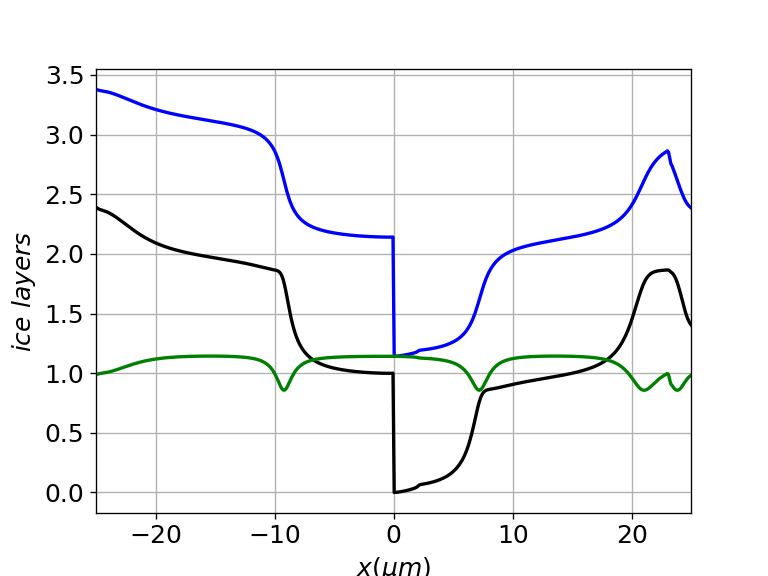

<IPython.core.display.Javascript object>


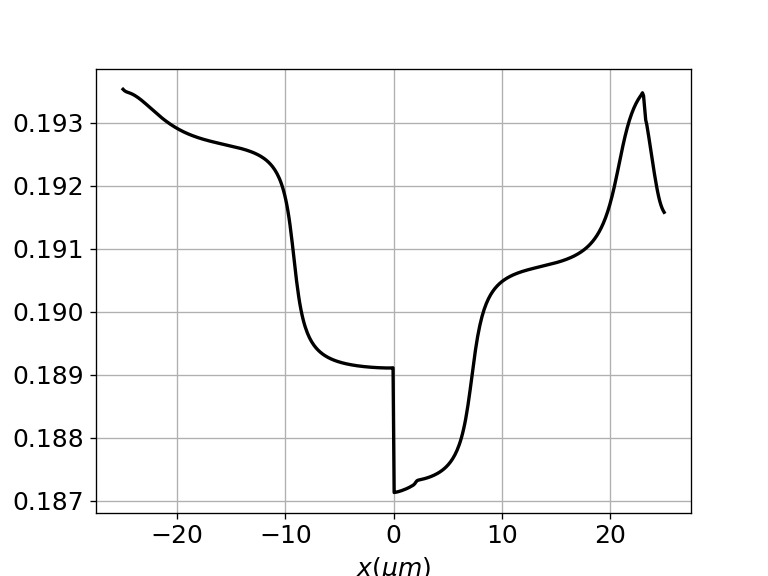

In [32]:
# Growth statistics
minpoint = min(Nice)
ncorner = 4
print("Height of Ice", minpoint)
delta_Ntot_entire = Ntot-Ntotkeep[0]
print( "1-D growth, corner", delta_Ntot_entire[ncorner])
print( "1-D growth, center", delta_Ntot_entire[nmid])
growthrate_entire = delta_Ntot_entire/ttot*umpersec_over_mlyperus
print( "1-D Modeled growth rate, corner, um/s", growthrate_entire[ncorner])
print( "1-D Modeled growth rate, corner, ml/us", growthrate_entire[ncorner]/umpersec_over_mlyperus)
print( "1-D Modeled growth rate, center, um/s", growthrate_entire[nmid])
alpha = growthrate_entire/nu_kin/sigmastep
print( "1-D Modeled alpha, corner", alpha[ncorner])
print( "1-D Modeled alpha, center", alpha[nmid])
print( "Difference, %", (alpha[nmid]-alpha[ncorner])/alpha[ncorner]*100)


# Comparisons with 0-D model
print( "0-D Modeled growth rate, um/s", growthrate_0d)
print( "0-D Modeled growth rate, ml/us", growthrate_0d/umpersec_over_mlyperus)
print( "0-D Modeled alpha", alpha_0d)
print( "Growth ratio 1D (corner)/0D", growthrate_entire[ncorner]/growthrate_0d)
print( "Growth ratio 1D (center)/0D", growthrate_entire[nmid]/growthrate_0d)
print( "Contribution of diffusion", (growthrate_entire[nmid]-growthrate_0d)/growthrate_0d*100, '%')

# Comparisons with Libbrecht
sigma0_L = 0.08
A_L = .28
alpha_L = A_L*np.exp(-sigma0_L/sigmastepmax)
print("Libbrecht's predicted growth rate, um/s", nu_kin*alpha_L*sigmastepmax)
print("Libbrecht's predicted alpha", alpha_L)

# Timing statistics
sec2 = time.time()
print("Time taken:", int((sec2-sec1)/60), "min", (sec2-sec1)%60, "secs")

# Plot
fignum +=1
plt.figure(fignum)
plt.plot(\
         x-xmid, Nice-minpoint, 'k', \
         x-xmid, Fliq+Nice-minpoint, 'b', \
         x-xmid, Fliq, 'g', lw=linewidth)
plt.xlabel(r'$x (\mu m$)',fontsize=fontsize)
plt.ylabel(r'$ice \ layers$',fontsize=fontsize)
plt.xlim([-xmid, xmid])
rcParams['xtick.labelsize'] = ticklabelsize 
rcParams['ytick.labelsize'] = ticklabelsize
plt.grid('on')

# Plot
fignum +=1
plt.figure(fignum)
plt.plot(x-xmid, alpha, 'k', lw=linewidth)
plt.xlabel(r'$x (\mu m$)',fontsize=fontsize)
plt.ylabel(r'$ \alpha $',fontsize=fontsize)
rcParams['xtick.labelsize'] = ticklabelsize 
rcParams['ytick.labelsize'] = ticklabelsize
plt.grid('on')


In [33]:
print(Save_new_file,nextfile)
print(trajflag,trajfile)
print(traj0flag,traj0file)

False NeshData/continuum_model6 28-5-2016[1][1].npz
False NeshData/continuum_model6 28-5-2016[1][1].traj.npz
False NeshData/continuum_model6 28-5-2016[1][1].traj0.npz


In [34]:
# Saving these results to file
print(Nice[0])
if Nice[0] > 100000:
    Nice -= 100000
if Save_new_file:
    print("saving to", nextfile)
    np.savez_compressed(nextfile, Nice=Nice, Fliq=Fliq, 
                        x=x, t=ttot,
                        Nbar=Nbar, Nstar=Nstar,
                        sigma0=sigma0, c_r=c_r, D=D, L=L, 
                        nu_kin=nu_kin, nu_kin_ml=nu_kin_ml, 
                        sigmastepmax=sigmastepmax, sigmastepstyle=sigmastepstyle)


50.52679999388036


In [35]:
if trajflag:
    print("saving to", trajfile)
    np.savez_compressed(trajfile, Nice=Nicekeep, Fliq=Fliqkeep,
                        x=x, t=tkeep, 
                        Nbar=Nbar, Nstar=Nstar,
                        sigma0=sigma0, c_r=c_r, D=D, L=L, 
                        nu_kin=nu_kin, nu_kin_ml=nu_kin_ml, 
                        sigmastepmax=sigmastepmax, sigmastepstyle=sigmastepstyle)


In [36]:
if traj0flag:
    print("saving to", traj0file)
    np.savez_compressed(traj0file, ykeep_0Darr=ykeep_0Darr,
                        x=x, tkeep_0D=tkeep_0D,  
                        sigma0=sigma0, c_r=c_r, D=D, L=L, 
                        nu_kin=nu_kin, nu_kin_ml=nu_kin_ml, 
                        sigmastepmax=sigmastepmax, sigmastepstyle=sigmastepstyle,
                        dtmaxtimefactor = dtmaxtimefactor,
                        deltaT = deltaT)
